In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

In [9]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [27]:
y_train = df_train.to_numpy()[:,0]
X_train = df_train.to_numpy()[:,1:]
y_test = df_test.to_numpy()[:,0]
X_test = df_test.to_numpy()[:,1:]
X_valid,y_valid = X_train[-700:], y_train[-700:]

In [28]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
X_train.shape, X_test.shape, X_valid.shape

((8519, 784), (1065, 784), (700, 784))

In [44]:
# Full model, Layers- 300, 100, 10
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(784,)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, verbose=0,
                validation_data=(X_valid, y_valid))
_, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy over completely labelled data: {test_acc}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6501 - loss: 1.0343
Test Accuracy over completely labelled data: 0.6403756141662598


In [45]:
# Original model, Layers- 500, 300,200, 100, 10
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(784,)))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, verbose=0,
                validation_data=(X_valid, y_valid))
_, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy over completely labelled data: {test_acc}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.9891
Test Accuracy over completely labelled data: 0.6732394099235535


In [38]:
# Full model, Layers- 1000, 500, 300, 200, 100, 10 (Best)
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(784,)))
model.add(tf.keras.layers.Dense(1000, activation="relu"))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, verbose=0,
                validation_data=(X_valid, y_valid))
_, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy over completely labelled data: {test_acc}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.9088
Test Accuracy over completely labelled data: 0.7305164337158203


In [46]:
# Full model, Layers- 1000, 700, 500, 300, 200, 100, 10
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(784,)))
model.add(tf.keras.layers.Dense(1000, activation="relu"))
model.add(tf.keras.layers.Dense(700, activation="relu"))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, verbose=0,
                validation_data=(X_valid, y_valid))
_, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy over completely labelled data: {test_acc}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 1.1770
Test Accuracy over completely labelled data: 0.5840375423431396


Layers: 1000, 500, 300, 200, 100, 10; Accuracy- 0.73 (Best)

Layers: 500, 300, 200, 100, 10; Accuracy- 0.67

Layers: 300, 100, 10; Accuracy- 0.64

Layers: 1000, 700, 500, 300, 200, 100, 10; Accuracy- 0.58

In [40]:
def SSL(K):
    kmeans = KMeans(K)
    kmeans.fit(X_train)
    cc = kmeans.cluster_centers_
    
    labelDict = dict([(i,None) for i in range(K)])
    for i in range(K):
        dist = np.linalg.norm(X_train - cc[i], axis=1)
        corLabel = y_train[np.argmin(dist)]
        labelDict[i] = corLabel
    
    propLabels = np.array([labelDict[i] for i in kmeans.predict(X_train)])

    tf.random.set_seed(42)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=(784,)))
    model.add(tf.keras.layers.Dense(1000, activation="relu"))
    model.add(tf.keras.layers.Dense(500, activation="relu"))
    model.add(tf.keras.layers.Dense(300, activation="relu"))
    model.add(tf.keras.layers.Dense(200, activation="relu"))
    model.add(tf.keras.layers.Dense(100, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd", metrics=["accuracy"])
    
    model.fit(X_train, propLabels, epochs=30, verbose=0,
                    validation_data=(X_valid, y_valid))
    _, test_acc = model.evaluate(X_test, y_test)
    return test_acc

In [41]:
test_accs = []
for K in [10,20,30,40,50,60,70,80,90,100]:
    test_accs.append(SSL(K))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1192 - loss: 12.7131
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1673 - loss: 12.5812
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1836 - loss: 12.6317
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2452 - loss: 9.4995
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2267 - loss: 10.5959
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2772 - loss: 8.1256
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2908 - loss: 9.5165
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss: 7.8020
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2964 - loss: 8.1351
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2833 - loss: 8.5388


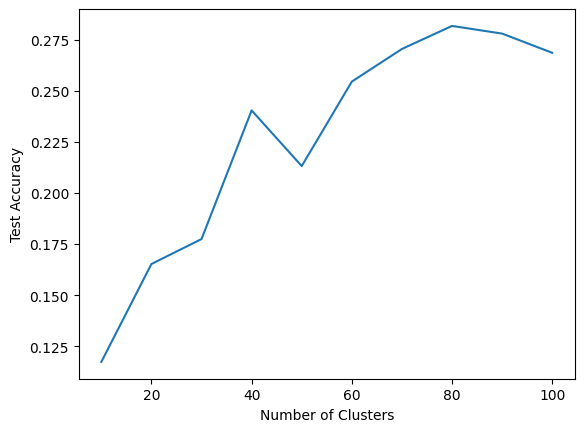

In [42]:
plt.plot([10,20,30,40,50,60,70,80,90,100],test_accs)
plt.xlabel("Number of Clusters")
plt.ylabel("Test Accuracy")
plt.show()